In [1]:
import numpy as np
#import sympy as sp
import cmath as cm
import matplotlib.pyplot as plt

epsilon_0 = 8.85e-12

In [2]:
n = 300
N = 3*n+1

K_1 = 80 #TiO2 dielectric constant
K_2 = 22 #ZrO2 dielectric constant
K_3 = 25 #HfO2 dielectric constant

sigma_1 = 1e-11 #TiO2 conductivity
sigma_2 = 1e-12 #ZrO2 conductivity
sigma_3 = 1e-6 #HfO2 conductivity

dielectric_list = ([K_1, K_2, K_3] * n) + [K_1]
conductivity_list = ([sigma_1, sigma_2, sigma_3] * n) + [sigma_1]
#print(len(dielectric_list))

thickness = 2e-10
total_thickness = thickness * N

sum1 = 0
sum2 = 0
for i in range(0, N):
  sum1 += thickness/conductivity_list[i]

for i in range(0, N):
  sum2 += thickness*dielectric_list[i]/(conductivity_list[i]**2)

k_eff = total_thickness * sum2 * ((sum1)**-2)

print(k_eff)

56.56396519375809


<ipython-input-3-bf1cc7ceb86e>:26: RuntimeWarning: divide by zero encountered in divide
  capacitance_n_stack = 1 / sum


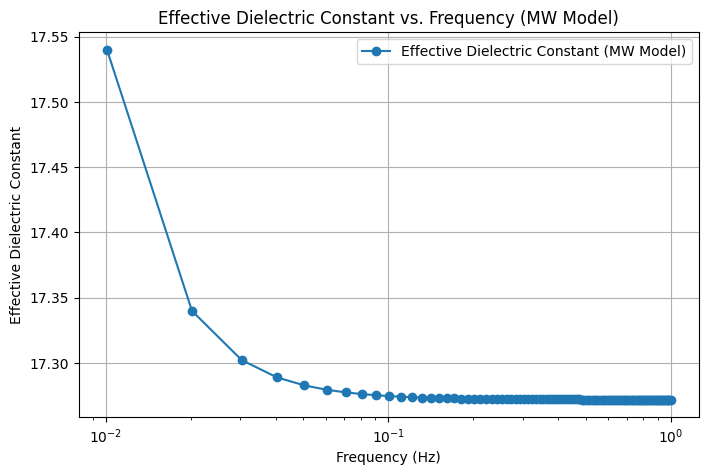

In [3]:
K_1 = 80.0 #TiO2 dielectric constant
K_2 = 22.0 #ZrO2 dielectric constant
K_3 = 25.0 #HfO2 dielectric constant
K_4 = 7.0 #S_1l2O3 dielectric constant

sigma_1 = 1e-11 #TiO2 conductivity
sigma_2 = 1e-12 #ZrO2 conductivity
sigma_3 = 1e-6 #HfO2 conductivity
sigma_4 = 1e-13 #S_1l2O3 conductivity

dielectric_list = np.array([K_1, K_2, K_3])
conductivity_list = np.array([sigma_1, sigma_2, sigma_3])
thickness = 2e-10
C = dielectric_list * epsilon_0 / thickness
tau = dielectric_list * epsilon_0 / conductivity_list
#print(C)
#print(tau)

def dielectric_model_v1(f, T):
  sum = 0
  w = 2 * np.pi * f
  for i in range(0,2):
    sum += (w**2 * (tau[i])**2 / C[i]) / (1 + w**2 * (tau[i])**2)
  sum = sum * T
  sum += (w**2 * (tau[0])**2 / C[0]) / (1 + w**2 * (tau[0])**2)
  capacitance_n_stack = 1 / sum
  dielectric_const = capacitance_n_stack * (T + 1) * thickness / epsilon_0
  return capacitance_n_stack, dielectric_const


f = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 5))
plt.semilogx(f, dielectric_model_v1(f, 800)[1], marker="o", label="Effective Dielectric Constant (MW Model)")
plt.title("Effective Dielectric Constant vs. Frequency (MW Model)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Effective Dielectric Constant")
plt.grid(True)
plt.legend()
plt.show()

3.2729984628716815e-09


<ipython-input-20-4d866f7df1aa>:32: RuntimeWarning: invalid value encountered in divide
  total_capacitance = S_1 / ((S_2**2 + S_1**2) * w)
<ipython-input-20-4d866f7df1aa>:35: RuntimeWarning: invalid value encountered in divide
  total_relaxation_time = S_1 / (S_2 * w)


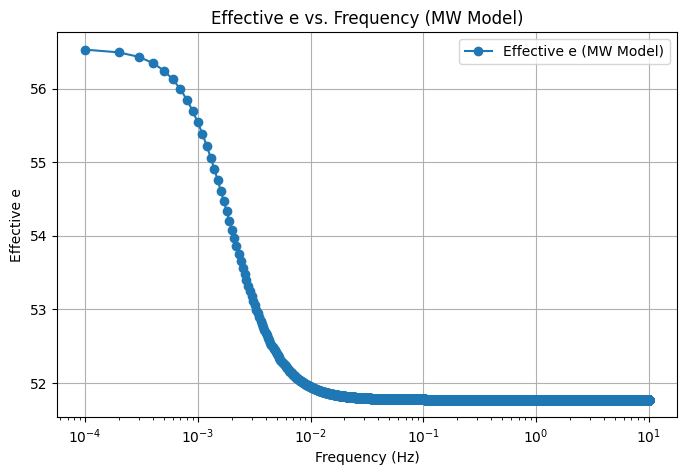

In [20]:
K_1 = 80 #TiO2 dielectric constant
K_2 = 22 #ZrO2 dielectric constant
K_3 = 27 #HfO2 dielectric constant

sigma_1 = 1e-11 #TiO2 conductivity
sigma_2 = 1e-12 #ZrO2 conductivity
sigma_3 = 1e-6 #HfO2 conductivity

A = np.pi * 1e-6
dielectric_list = np.array([K_1, K_2, K_3])
conductivity_list = np.array([sigma_1, sigma_2, sigma_3])
thickness = 2e-10
C = dielectric_list * epsilon_0 * A / thickness
tau = dielectric_list * epsilon_0 / conductivity_list


def dielectric_model_v2(f, T):
  S_1 = 0
  S_2 = 0
  w = 2 * np.pi * f
  for i in range(0,2):
    S_1 += (w * (tau[i])**2 / C[i]) / (1 + w**2 * (tau[i])**2)
  S_1 = S_1 * T
  S_1 += (w * (tau[0])**2 / C[0]) / (1 +  w**2 * (tau[0])**2)

  for i in range(0,2):
    S_2 += (tau[i] / C[i]) / (1 + w**2 * (tau[i])**2)
  S_2 = S_2 * T
  S_2 += (tau[0] / C[0]) / (1 + w**2 * (tau[0])**2)

  total_thickness = thickness * (3 * T + 1) #2e-4???
  total_capacitance = S_1 / ((S_2**2 + S_1**2) * w)
  total_dielectric_const = total_capacitance * total_thickness / (A * epsilon_0)
  total_resistance = (S_2**2 + S_1**2) / S_2
  total_relaxation_time = S_1 / (S_2 * w)
  return total_capacitance, total_dielectric_const, total_resistance, total_relaxation_time

print(dielectric_model_v2(0.0001, 800)[0])
f = np.linspace(0, 10, 100000)
plt.figure(figsize=(8, 5))
plt.semilogx(f, dielectric_model_v2(f, 800)[1], marker="o", label="Effective e (MW Model)")
plt.title("Effective e vs. Frequency (MW Model)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Effective e")
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-33-702ba5f156f1>:32: RuntimeWarning: invalid value encountered in divide
  total_capacitance = S_1 / ((S_2**2 + S_1**2) * w)
<ipython-input-33-702ba5f156f1>:35: RuntimeWarning: invalid value encountered in divide
  total_relaxation_time = S_1 / (S_2 * w)


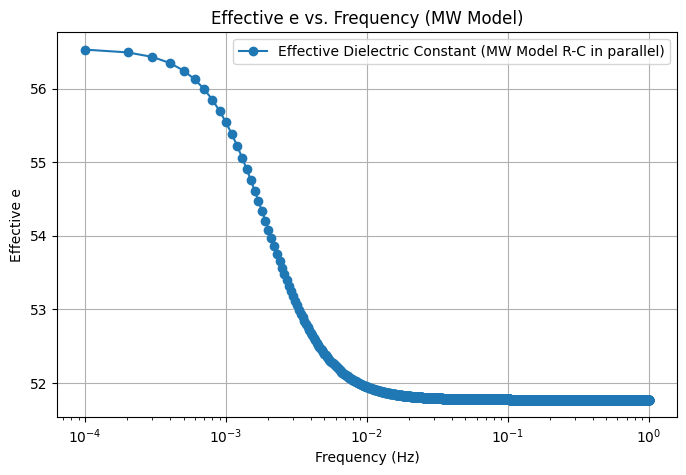

In [34]:
f = np.linspace(0, 1, 10000)
plt.figure(figsize=(8, 5))
#plt.semilogx(f, dielectric_model_v1(f, 800)[0], marker="o", label="Effective Capacitance Constant (MW Model Only C)")
#plt.semilogx(f, dielectric_model_v1(f, 800)[1], marker="o", label="Effective Dielectric Constant (MW Model Only C)")

#plt.semilogx(f, dielectric_model_v2(f, 800)[0], marker="o", label="Effective Capacitance (MW Model R-C in parallel)")
plt.semilogx(f, dielectric_model_v2(f, 800)[1], marker="o", label="Effective Dielectric Constant (MW Model R-C in parallel)")
#plt.semilogx(f, dielectric_model_v2(f, 800)[2], marker="o", label="Effective Resistance (MW Model R-C in parallel)")
#plt.semilogx(f, dielectric_model_v2(f, 800)[3], marker="o", label="Effective Relaxation Time (MW Model R-C in parallel)")
plt.title("Effective e vs. Frequency (MW Model)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Effective e")
plt.grid(True)
plt.legend()
plt.show()